In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gene_transcript_go_api as gtga

In [2]:
human = gtga.parse_input("../data/human_input.tsv")
#mouse = gtga.parse_input("../data/mouse_input.tsv")

In [7]:
human_path = "/home/pgerenton/Documents/intrinsicgenediversity/res/human.no_empty_transcript.intragene_isoform_diversity.data.tsv"
#mouse_path = "../res/mouse.intragene_isoform_diversity.data.tsv"

In [8]:
human_df = pd.read_csv(human_path, sep='\t')
#mouse_df = pd.read_csv(mouse_path, sep='\t')

In [9]:
human_df

,Gene,Type,Number of isoform,Jaccard Index,Dice coefficient,Overlap coefficient,Redundance metric,Stdev number GO term,BP similarity,CC similarity,MF similarity
0,ENSG00000292344,Observed,5,0.900000,0.942857,1.000000,0.750000,1.200000,1.000000,0.600000,1.000000
1,ENSG00000292358,Observed,1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
2,ENSG00000292327,Observed,1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
3,ENSG00000292354,Observed,2,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
4,ENSG00000292363,Observed,2,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
35169,ENSG00000008735,Expected,1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
35170,ENSG00000100299,Expected,2,0.231884,0.376471,0.413793,0.231884,11.500000,0.676000,0.887000,0.705000
35171,ENSG00000251322,Expected,4,0.032888,0.063165,0.541240,0.034562,142.778456,0.174167,0.685333,0.143667
35172,ENSG00000100312,Expected,1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


In [10]:
human_df["With empty transcript"] = human_df["Gene"].apply(human.get_gene).apply(gtga.Gene.is_an_isoform_without_go)#
#mouse_df["With empty transcript"] = human_df["Gene"].apply(human.get_gene).apply(gtga.Gene.is_an_isoform_without_go)


In [19]:
def makeplot(species, typ, which, corr, trend, x, y):
    if species == "human":
        data = human_df
    elif species == "mouse":
        data = mouse_df
    else:
        raise ValueError("species can only be 'human' or 'mouse'")
    
    if typ == "expected":
        data = data[data['Type'] == 'Expected'].drop(["Gene", "Type"], axis = 1)
    elif typ == "observed":
        data = data[data['Type'] == 'Observed'].drop(["Gene", "Type"], axis = 1)
    else:
        raise ValueError("uncorrect typ")
    
    if which == "multi":
        data = data[data["Number of isoform"] != 1]
    elif which == "all":
        pass
    else:
        raise ValueError("uncorrect which")


    fig , ax  = plt.subplots(1,2,figsize=(15, 6))
    fig.suptitle("DATASET : " + typ + " data in " + species, fontsize=16)
    plot = sns.scatterplot(
        data = data,
        x = x,
        y = y,
        ax=ax[0]
    #    fill=True
    )
    ax[0].set(xlabel=x, ylabel=y)
    plot = sns.kdeplot(
        data = data,
        x = x,
        y = y,
        ax=ax[1],
        fill=True)
    ax[1].set(xlabel=x, ylabel=y)   

    print(f"{corr} correlation is {data[x].corr(data[y],corr)}")   


    if trend == "median":
        med = data.drop(["With empty transcript"], axis = 1).groupby(x).median()
        ax[0].scatter(x=med.index, y=med[y],color="red",s=5)
    elif trend == "mean":
        med = data.drop(["With empty transcript"], axis = 1).groupby(x).mean()
        ax[0].scatter(x=med.index, y=med[y],color="red",s=5)
    elif trend == 'nogo':
        med = data[data["With empty transcript"]]
        ax[0].scatter(x=med[x], y=med[y],color='red',s=5)
    elif trend == "none":
        pass
    else:
        raise ValueError("trend should be 'none', 'median' or 'mean' or 'nogo")


spearman correlation is 0.9563400550260405


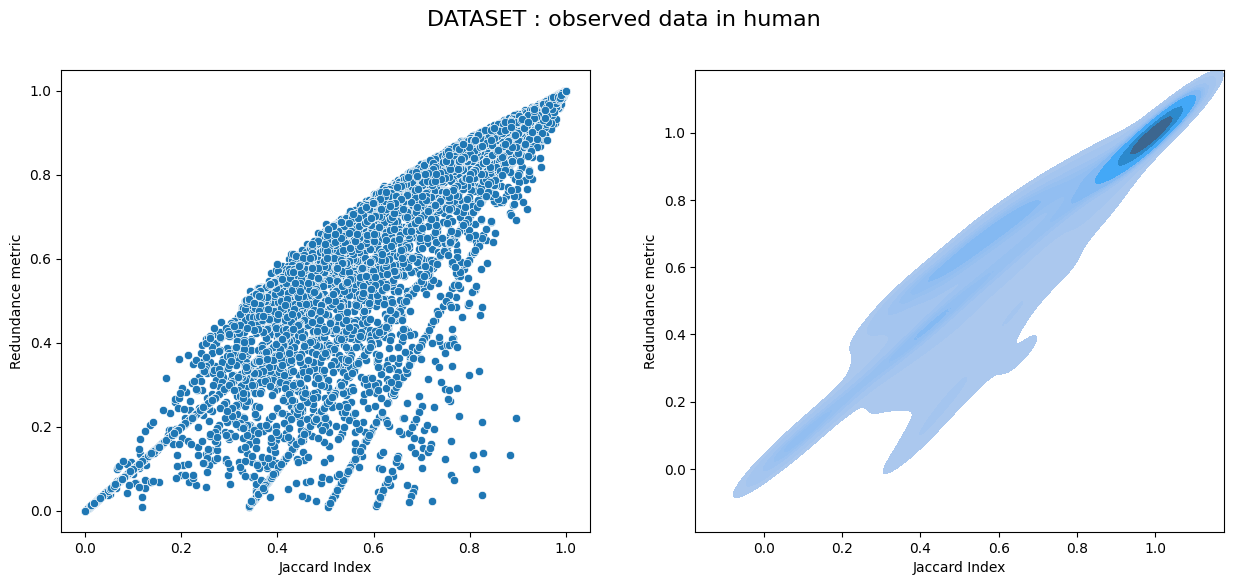

In [29]:
makeplot("human", "observed", "multi", "spearman", 'none',"Jaccard Index", "Redundance metric")

<Axes: xlabel='Number of isoform', ylabel='BP similarity'>

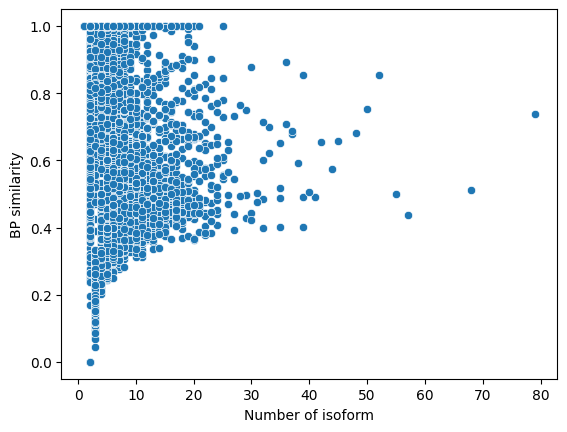

In [30]:
data = human_df[human_df['Type'] != 'Expected']
sns.scatterplot(data= data, x='Number of isoform', y='BP similarity')

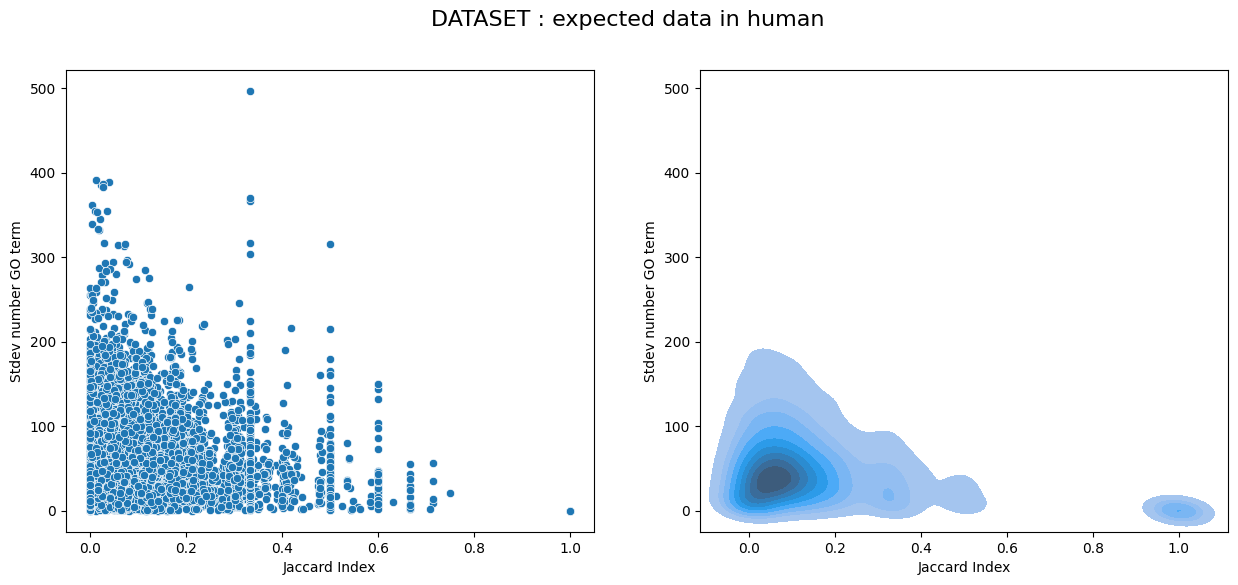

In [31]:
makeplot("human", "expected", "multi", "spearman", 'none', "Jaccard Index", "Stdev number GO term")

In [16]:
human_obs = human_df[human_df['Type'] == 'Observed'].drop(["Gene", "Type"], axis = 1)
#mouse_obs = mouse_df[mouse_df['Type'] == 'Observed'].drop(["Gene", "Type"], axis = 1)
human_exp = human_df[human_df['Type'] == 'Expected'].drop(["Gene", "Type"], axis = 1)
#mouse_exp = mouse_df[mouse_df['Type'] == 'Expected'].drop(["Gene", "Type"], axis = 1)

human_obs = human_obs[human_obs["Number of isoform"] != 1]
#mouse_obs = mouse_obs[mouse_obs["Number of isoform"] != 1]
human_exp = human_exp[human_exp["Number of isoform"] != 1]
#mouse_exp = mouse_exp[mouse_exp["Number of isoform"] != 1]

Text(0.5, 1.0, 'Human Obs Spearman')

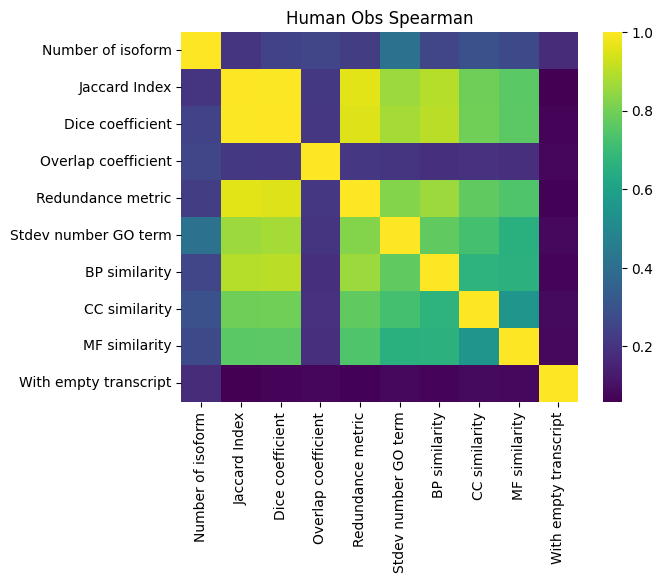

In [17]:
corr = human_obs.corr('spearman')
corr
plot = sns.heatmap(abs(corr), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.color_palette('viridis', as_cmap=True))
plot.set_title("Human Obs Spearman")

In [34]:
print(len(human_obs["Overlap coefficient"]))

print(sum(human_obs["With empty transcript"]==1))

14128
9035
